#  GCP에서 데이터 불러오기

In [162]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'avian-slice-386906' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_7feb50ab_188dcc57816') # Job ID inserted based on the query results selected to explore
print(job.query)

# Running this code will read results from your previous job

job = client.get_job('bquxjob_7feb50ab_188dcc57816') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

SELECT * FROM `avian-slice-386906.Linear.temp_new2`;


,USER_ID_hash,REG_DATE,SEX_ID,AGE,Tr_Pref_Name,Tr_small_area_name,Translated_capsule_text,Translated_genre_name,VIEW_COUPON_ID_hash,usable_date_sum,...,usable_date_tue,usable_date_wed,usable_date_thu,usable_date_fri,usable_date_sat,usable_date_sun,usable_date_holiday,usable_date_before_holiday,Male,Female
0,7d4dc5d0bd30c6fb8668f67f696085b7,2011-05-25 19:45:01+00:00,f,53,홋카이도,신주코・타카다바바・나카노・요시노,택배,택배,000fb2d3790cd8860e337290db189abe,0,...,0,0,0,0,0,0,0,0,0,1
1,686fd9cbff7e99eadac346a0992cc668,2010-11-17 09:47:58+00:00,f,64,치바현,신주코・타카다바바・나카노・요시노,택배,택배,000fb2d3790cd8860e337290db189abe,0,...,0,0,0,0,0,0,0,0,0,1
2,595c43fd0e5cdcba9c6a021eabd3e36a,2010-09-20 19:36:08+00:00,f,48,도쿄도,아카사카・로폰기・아자부,택배,택배,001bfef329189383f85fcd9f34ea7591,0,...,0,0,0,0,0,0,0,0,0,1
3,dfe5d0e1953ec56ad840ca8f5c7839e4,2011-11-10 02:03:08+00:00,m,48,시가현,기후,택배,택배,0059b29634aa04d0aed566844200c0b3,0,...,0,0,0,0,0,0,0,0,1,0
4,b1fb96b3f0c3ef09050f4eae952d7796,2011-07-11 12:42:34+00:00,f,42,None,아이치,택배,택배,007cbef313067c109c2bdeae253bc133,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517201,271d5aff4abea5273ecbb76485e1107e,2010-11-05 13:37:18+00:00,m,45,도쿄도,후쿠오카,게스트 하우스,호텔・여관,a4159dab48e228e5d477dcd0607d16cc,6,...,1,1,1,1,1,0,0,0,1,0
2517202,fcd95b0164022d85b23ed5cec88e7462,2011-08-31 21:55:13+00:00,m,27,효고현,후쿠오카,게스트 하우스,호텔・여관,b5328e26af82f3b1a7a7948d8f5d6b7b,6,...,1,1,1,1,1,0,0,0,1,0
2517203,3a2686d2d2a31f6d507fb915e2eb21e8,2011-05-29 20:15:09+00:00,m,64,사이타마현,꾸마,게스트 하우스,호텔・여관,ec41335c6b0dd0838bff677462745095,9,...,1,1,1,1,1,1,1,1,1,0
2517204,326c5552ade21b06343bca422b3a60f7,2011-02-21 13:48:07+00:00,f,41,치바현,꾸마,게스트 하우스,호텔・여관,ec41335c6b0dd0838bff677462745095,9,...,1,1,1,1,1,1,1,1,0,1


# 2. 데이터 확인하기

## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [163]:
results.describe()

,AGE,usable_date_sum,view_count,PRICE_RATE,DISCOUNT_PRICE,VALIDPERIOD,DISPPERIOD,PURCHASE_FLG,usable_date_mon,usable_date_tue,usable_date_wed,usable_date_thu,usable_date_fri,usable_date_sat,usable_date_sun,usable_date_holiday,usable_date_before_holiday,Male,Female
count,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0,2517206.0
mean,47.300553,5.079688,432.860096,58.339597,4279.764005,10804.253592,3.786802,0.048621,0.582664,0.58988,0.598368,0.600991,0.581321,0.521834,0.534876,0.534876,0.534876,0.45557,0.54443
std,11.23943,4.170009,1176.083429,12.241049,5486.773682,14228.368037,3.000429,0.215074,0.493119,0.491855,0.490228,0.489695,0.493343,0.499523,0.498782,0.498782,0.498782,0.498022,0.498022
min,15.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,39.0,0.0,108.0,50.0,1470.0,3249.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,48.0,8.0,216.0,52.0,2500.0,6000.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
75%,55.0,9.0,435.0,64.0,4900.0,13200.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,80.0,9.0,14779.0,100.0,100000.0,680000.0,36.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [164]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = results
df = df.dropna()
df.columns

Index(['USER_ID_hash', 'REG_DATE', 'SEX_ID', 'AGE', 'Tr_Pref_Name',
       'Tr_small_area_name', 'Translated_capsule_text',
       'Translated_genre_name', 'VIEW_COUPON_ID_hash', 'usable_date_sum',
       'view_count', 'PRICE_RATE', 'DISCOUNT_PRICE', 'VALIDPERIOD',
       'DISPPERIOD', 'PURCHASE_FLG', 'dispfrom', 'dispend', 'usable_date_mon',
       'usable_date_tue', 'usable_date_wed', 'usable_date_thu',
       'usable_date_fri', 'usable_date_sat', 'usable_date_sun',
       'usable_date_holiday', 'usable_date_before_holiday', 'Male', 'Female'],
      dtype='object')

In [166]:
len(df['AGE'])

2033884

## 1-1. 명목형 데이터 확인

In [171]:
cat_col_names = ['USER_ID_hash','VIEW_COUPON_ID_hash','Tr_Pref_Name',
                 'Tr_small_area_name','Translated_capsule_text',
                 'Translated_genre_name','usable_date_sum']

def view_cate_unique(cat_col_names):
  for col_name in cat_col_names:
    cat_values = np.unique(df[col_name])
    print(f"{col_name}: {cat_values}\n")

view_cate_unique(cat_col_names)



USER_ID_hash: ['00035b86e6884589ec8d28fbf2fe7757' '000cc06982785a19e2a2fdb40b1c9d59'
 '0013518e41c416cd6a181d277dd8ca0b' ... 'fff970d2014c3e10a77e38d540239017'
 'fffafc024e264d5d539813444cf61199' 'ffff56dbf3c782c3532f88c6c79817ba']

VIEW_COUPON_ID_hash: ['000eba9b783cec10658308b5836349f6' '000fb2d3790cd8860e337290db189abe'
 '000fe109aea0546a32ffbe54091297e1' ... 'fff37291f190b3b7a97336052d2b69a3'
 'fff58e3960585ba89a4e649f5c7cc11e' 'fffa212f26e62e489ec16dbe55a88c57']

Tr_Pref_Name: ['경토부' '고치현' '기후현' '꾸마현' '나가노현' '나가사키현' '나라현' '니가타현' '도야마현' '도치기현' '도쿄도'
 '도토리현' '미야기현' '미야자키현' '미에현' '사가현' '사이타마현' '시가현' '시마네현' '시즈오카현' '아오모리현'
 '아이치현' '아키타현' '야마가타현' '야마구치현' '야마나시현' '에히메현' '오사카부' '오이타현' '오카야마현'
 '오키나와현' '와카야마현' '이바라키현' '이시카와현' '이와테현' '치바현' '카가와현' '카고시마현' '칸나가와현'
 '쿠마모토현' '토쿠시마현' '홋카이도' '효고현' '후쿠시마현' '후쿠오카현' '후쿠이현' '히로시마현']

Tr_small_area_name: ['경토' '고치' '기후' '긴자・신바시・도쿄・우에노' '꾸마' '나가노' '나가사키' '나라' '니가타' '도야마' '도치기'
 '도토리' '미나미타' '미야기' '미야자키' '미에' '사가' '사이타마' '시가' '시마네' '시부야・아오야마・지유가오카'
 '시

In [172]:
print(f"USER_ID_hash의 든 고유 class의 개수 {len(np.unique(df['USER_ID_hash']))}")
print(f"VIEW_COUPON_ID_hash의 든 고유 class의 개수 {len(np.unique(df['VIEW_COUPON_ID_hash']))}")

USER_ID_hash의 든 고유 class의 개수 15527
VIEW_COUPON_ID_hash의 든 고유 class의 개수 19404


In [174]:
df['USER_ID_hash'].value_counts()

322a3a65e6683b6881eeb0b1a889e3f4    3125
070a8c47e1ced81abe33aec7fe371f96    2907
9ec57756932f97bb57a02c4ad864ad3e    2587
faa6af52e6bb405fe0ad957612f51795    2330
0f20decaff5a127ad70005c5ba568279    2318
                                    ... 
d5872e161271d15a31c717d5474d3b45       1
251f625592d155fa6e5886f4cad00b71       1
1318c1e8f480610343a2c6da0ec84e9a       1
e97d6be0c8e645c9fcea92cb326f66fc       1
ae6588ce58592154242130e56d12ae51       1
Name: USER_ID_hash, Length: 15527, dtype: int64

<Axes: >

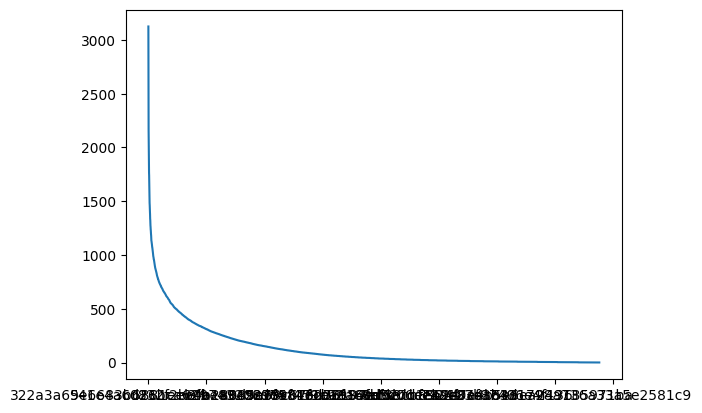

In [175]:
df['USER_ID_hash'].value_counts().plot()

<Axes: >

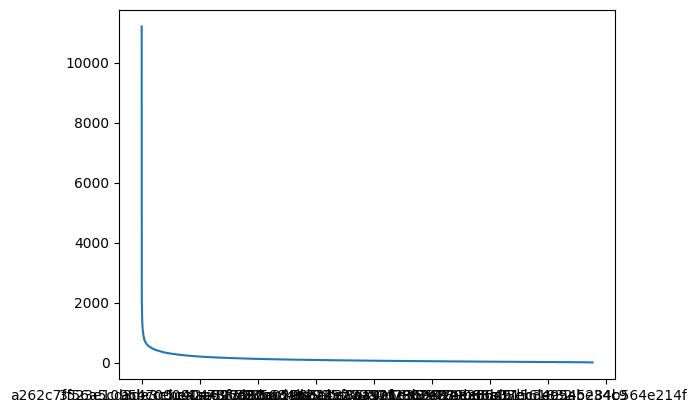

In [176]:
df['VIEW_COUPON_ID_hash'].value_counts().plot()

# 3. 데이터 전처리

* 3-1. 명목형 변수 - Label Encoder 후 to_categorical()
* 3-2. 이진분류 및 정수형태의 명목형 변수 - to_categorical()
* 3-3. 연속형 변수 - 정규화/StandardScaler()

-------------------------------------------
## 3-1. 명목형 변수 - Label Encoder

 Embedding Layer 사용시 모델의 층이 많아지는 문제(모델 파라미터 약 16만) - 과대적합 발생 원인으르 분석하여 embedding layer을 사용하지 않고 원핫 인코딩 방식 사용: to_categorical() 사용

In [177]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


category_xs = []
category_encoders = []

def cate_one_hot(cat_col_names):
  """ 명목형 변수 cat_col_names를 정수형으로 변환하고 원핫인코딩하는 작업 """

  for col_name in cat_col_names:

    encoder = LabelEncoder()
    encoded_xs = encoder.fit_transform(df[col_name])
    encoded_xs = to_categorical(encoded_xs)

    category_xs.append(encoded_xs)
    category_encoders.append(encoder)


def bin_one_hot(bin_cate_cols):
  for bin_cate_col in bin_cate_cols:

    trans_1D_array = df[bin_cate_col].array
    trans_1D_array = to_categorical(trans_1D_array)
    category_xs.append(trans_1D_array)

In [179]:
cat_col_names = ['Tr_Pref_Name','Tr_small_area_name','usable_date_sum']

cate_one_hot(cat_col_names)

## 3-2. 이진분류 및 정수형태의 명목형 변수

In [181]:
bin_cate_cols = ['PURCHASE_FLG','DISPPERIOD', 'usable_date_mon', 'usable_date_tue',
       'usable_date_wed', 'usable_date_thu', 'usable_date_fri',
       'usable_date_sat', 'usable_date_sun', 'usable_date_holiday',
       'usable_date_before_holiday', 'Male', 'Female', 'usable_date_sum']

bin_one_hot(bin_cate_cols)

원-핫 인코딩
- 입력층에 들어가는 배열의 shape가 맞지 않는 문제
shape가 맞지 않으면 딥러닝 상에서 모델 학습이 안되는지는 시도해볼 필요가 있으나 전처리 과정이 길어질 것으로 예상


# <Embedding Layer사용>


## 1. 명목형 데이터 전처리

only LabelEncoder

In [182]:
from sklearn.preprocessing import LabelEncoder

category_xs = []
category_encoders = []

def cate_LabelEncoding(cat_col_names):
  for col_name in cat_col_names:

    encoder = LabelEncoder()
    encoded_xs = encoder.fit_transform(df[col_name])

    category_xs.append(encoded_xs)
    category_encoders.append(encoder)


def bin_cate_col(bin_cate_cols):

  for bin_cate_col in bin_cate_cols:
    trans_1D_array = df[bin_cate_col].array
    category_xs.append(trans_1D_array)

In [183]:
cat_col_names = ['Tr_Pref_Name','Tr_small_area_name','usable_date_sum']

bin_cate_cols = ['PURCHASE_FLG','DISPPERIOD', 'usable_date_mon', 'usable_date_tue',
       'usable_date_wed', 'usable_date_thu', 'usable_date_fri',
       'usable_date_sat', 'usable_date_sun', 'usable_date_holiday',
       'usable_date_before_holiday', 'Male', 'Female', 'usable_date_sum']


cate_LabelEncoding(cat_col_names)
bin_cate_col(bin_cate_cols)

In [184]:
category_xs = np.stack(category_xs, axis=1)
category_xs = category_xs.astype(float)
category_xs

array([[41., 22.,  0., ...,  0.,  1.,  0.],
       [35., 22.,  0., ...,  0.,  1.,  0.],
       [10., 25.,  0., ...,  0.,  1.,  0.],
       ...,
       [16.,  4.,  9., ...,  1.,  0.,  9.],
       [35.,  4.,  9., ...,  0.,  1.,  9.],
       [10.,  4.,  9., ...,  0.,  1.,  9.]])

## 2. 숫자형 데이터 전처리

standarscaler()사용

In [185]:
from sklearn.preprocessing import StandardScaler

numeric_col_names = ['AGE','view_count', 'PRICE_RATE', 'DISCOUNT_PRICE']

numeric_encoder = StandardScaler()
numeric_xs = numeric_encoder.fit_transform(df[numeric_col_names])
numeric_xs

array([[ 0.47855476, -0.03021341,  1.6482547 , -0.49536808],
       [ 1.47657574, -0.03021341,  1.6482547 , -0.49536808],
       [ 0.02490886, -0.25515437, -0.50290517, -0.20868819],
       ...,
       [ 1.47657574, -0.15625037, -0.66837901,  1.49318929],
       [-0.6101954 , -0.15625037, -0.66837901,  1.49318929],
       [ 1.2043882 , -0.15625037, -0.66837901,  1.49318929]])

# 타켓 변수 변환

* Translated_genre_name 사용

In [186]:
np.unique(df['Translated_genre_name'])

array(['건강・의료', '기타 쿠폰', '기프트 카드', '네일・아이', '레슨', '레저', '뷰티', '에스테틱',
       '음식', '택배', '헤어 살롱', '호텔・여관', '휴식'], dtype=object)

In [187]:
target_xs = []
target_encoders = []


encoder = LabelEncoder()
encoded_xs = encoder.fit_transform(df['Translated_genre_name'])

target_xs.append(encoded_xs)
target_encoders.append(encoder)

target_xs = np.stack(target_xs, axis=1)
target_xs

array([[ 9],
       [ 9],
       [ 9],
       ...,
       [11],
       [11],
       [11]])

# 테이터 나누기

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

category_xs, numeric_xs, target_xs = shuffle(category_xs, numeric_xs, target_xs)

splitted = train_test_split(category_xs, numeric_xs, target_xs,
                            test_size=0.2,stratify=target_xs)

train_category_xs, train_numeric_xs, train_ys = splitted[::2]
test_category_xs, test_numeric_xs, test_ys = splitted[1::2]

In [189]:
# 타켓 원-핫 인코딩
# https://stackoverflow.com/questions/61550026/valueerror-shapes-none-1-and-none-3-are-incompatible


train_ys = tf.keras.utils.to_categorical(train_ys, 13)
test_ys = tf.keras.utils.to_categorical(test_ys, 13)

## 명목형 입력값 임베딩
Embedding Layer 사용
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

LabelEncoder을 이용하면 지정된 정숫값의 서열이 있는 상태로 인코딩됨 해당 서열 정보를 없애주기 위해 딥러닝에서는 Embedding Layer를 사용할 수 있다.

In [191]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Concatenate


# 명목형 변수의 개수
category_inputs = Input((17,), dtype=tf.int32)

# 숫자형 변수의 개수
numeric_inputs = Input((4,), dtype=tf.float32)




embed_size = 3
# 임베딩 레이어 설정
embeds = []
for idx, col_name in enumerate(cat_col_names):
      # 각 변수 별 카테고리의 갯수
      category_size = len(category_encoders[idx].classes_)

      # 각 변수 별로 임베딩 레이어 적용 (-> 각 변수 내 카테고리별로 임베딩 값들이 모델에서 학습)
      category_embeded = Embedding(
          category_size, embed_size, name=col_name+'_embed')(category_inputs[:,idx])

      embeds.append(category_embeded)
print(embeds)


# 명목형 변수와 수치형 변수 합치기

inputs_list = embeds + [numeric_inputs]
concats = Concatenate(name='embed_concat')(inputs_list)
concats

[<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'Tr_Pref_Name_embed')>, <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'Tr_small_area_name_embed')>, <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'usable_date_sum_embed')>]


<KerasTensor: shape=(None, 13) dtype=float32 (created by layer 'embed_concat')>

# 딥러닝 모델 구성

* 하이퍼 파라미터 조정
1) 은닉층 개수 - 2개 고정
2) 옵티마이저  - Adam 고정
3) 드롭아옷 - 0.5 고정
4) 층의 뉴런 개수(neuron_counts) = [13,50,100]
5) batch_size =  [64,512,1028]
6) learning_rate = [0.1,0.01, 0.001]


과적합 방지를 위해 L2규제 사용


In [192]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model

def model_builder(neuron_count):
  hidden = Dense(neuron_count,activation='relu', name='hidden1',
                kernel_regularizer=l2(1e-5))(concats)

  hidden = Dropout(0.5, name='dropout1')(hidden)

  hidden = Dense(neuron_count,activation='relu', name='hidden2',
                kernel_regularizer=l2(1e-5))(hidden)
  hidden = Dropout(0.5, name='dropout2')(hidden)

  output = Dense(13, activation='softmax', name='output',
                kernel_regularizer=l2(1e-5))(hidden)

  model = Model([category_inputs, numeric_inputs], output)


  return model

In [193]:
neuron_counts = [13,50,100]

model1 = model_builder(neuron_counts[0])
model2 = model_builder(neuron_counts[1])
model3 = model_builder(neuron_counts[2])


model1.summary()

Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 tf.__operators__.getitem_9 (Sl  (None,)             0           ['input_9[0][0]']                
 icingOpLambda)                                                                                   
                                                                                                  
 tf.__operators__.getitem_10 (S  (None,)             0           ['input_9[0][0]']                
 licingOpLambda)                                                                                  
                                                                                           

### model1_1
* 각 층의 뉴런 13개/배치 64/학습률 0.1

In [194]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 0.1)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')

  # 조기 종료
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]


history = model1.fit(x=train_xs, y=train_ys,
            batch_size=64, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
22882/22882 [==============================] - 73s 3ms/step - loss: 1.3598 - accuracy: 0.5195 - val_loss: 1.2373 - val_accuracy: 0.5358
Epoch 2/100
22882/22882 [==============================] - 68s 3ms/step - loss: 1.4054 - accuracy: 0.5004 - val_loss: 1.2159 - val_accuracy: 0.5350
Epoch 3/100
22882/22882 [==============================] - 62s 3ms/step - loss: 1.4291 - accuracy: 0.4980 - val_loss: 1.2421 - val_accuracy: 0.5424
Epoch 4/100
22882/22882 [==============================] - 66s 3ms/step - loss: 1.4081 - accuracy: 0.5061 - val_loss: 1.1991 - val_accuracy: 0.5360
Epoch 5/100
22882/22882 [==============================] - 58s 3ms/step - loss: 1.4890 - accuracy: 0.4745 - val_loss: 1.2728 - val_accuracy: 0.5362
Epoch 6/100
22882/22882 [==============================] - 60s 3ms/step - loss: 1.5714 - accuracy: 0.4354 - val_loss: 1.3052 - val_accuracy: 0.5532
Epoch 7/100
22882/22882 [==============================] - 89s 4ms/step - loss: 1.6452 - accuracy: 0.3660 - val_

In [195]:
def acc_lossplot(model, name):
  loss, acc = model.evaluate(x=[test_category_xs, test_numeric_xs], y=test_ys, verbose=1)
  print(f"딥러닝 모형의 정확도 : {acc:.3%}")

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')

  plt.title(name)
  plt.legend(['train', 'val'])
  plt.show()

12712/12712 [==============================] - 30s 2ms/step - loss: 1.2017 - accuracy: 0.5356
딥러닝 모형의 정확도 : 53.559%


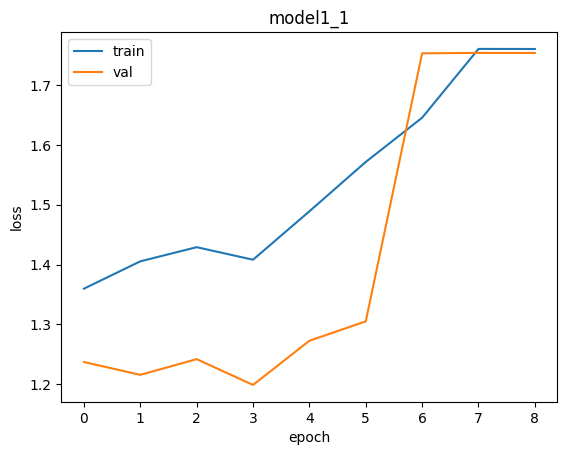

In [196]:
acc_lossplot(model1, 'model1_1')

### model1_2
* 각 층의 뉴런 13개/배치 64/학습률 0.01

In [197]:
model1_2 = model_builder(neuron_counts[0])

In [198]:
opt = Adam(learning_rate = 0.01)
model1_2.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_2.fit(x=train_xs, y=train_ys,
            batch_size=64, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
22882/22882 [==============================] - 170s 5ms/step - loss: 0.9896 - accuracy: 0.7082 - val_loss: 0.7532 - val_accuracy: 0.7722
Epoch 2/100
22882/22882 [==============================] - 111s 5ms/step - loss: 0.9551 - accuracy: 0.7193 - val_loss: 0.7527 - val_accuracy: 0.7725
Epoch 3/100
22882/22882 [==============================] - 98s 4ms/step - loss: 0.9507 - accuracy: 0.7198 - val_loss: 0.7468 - val_accuracy: 0.7723
Epoch 4/100
22882/22882 [==============================] - 99s 4ms/step - loss: 0.9463 - accuracy: 0.7210 - val_loss: 0.7519 - val_accuracy: 0.7726
Epoch 5/100
22882/22882 [==============================] - 75s 3ms/step - loss: 0.9448 - accuracy: 0.7208 - val_loss: 0.7575 - val_accuracy: 0.7722
Epoch 6/100
22882/22882 [==============================] - 58s 3ms/step - loss: 0.9432 - accuracy: 0.7220 - val_loss: 0.7674 - val_accuracy: 0.7728
Epoch 7/100
22882/22882 [==============================] - 67s 3ms/step - loss: 0.9421 - accuracy: 0.7214 - va

12712/12712 [==============================] - 20s 2ms/step - loss: 0.7380 - accuracy: 0.7722
딥러닝 모형의 정확도 : 77.224%


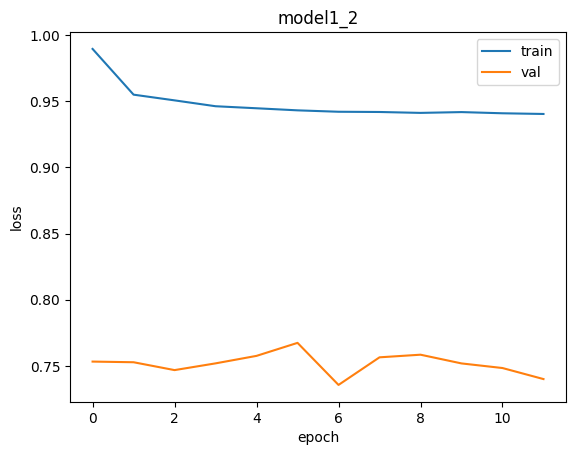

In [199]:
acc_lossplot(model1_2, 'model1_2')

### model1_3

* 각 층의 뉴런 13개/배치 64/학습률 0.001

In [200]:
model1_3= model_builder(neuron_counts[0])

In [201]:
opt = Adam(learning_rate = 0.001)
model1_3.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


# 조기 종료
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)

train_xs = [train_category_xs,train_numeric_xs]


history = model1_3.fit(x=train_xs, y=train_ys,
            batch_size=64, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
22882/22882 [==============================] - 53s 2ms/step - loss: 0.9299 - accuracy: 0.7068 - val_loss: 0.7045 - val_accuracy: 0.7834
Epoch 2/100
22882/22882 [==============================] - 53s 2ms/step - loss: 0.8597 - accuracy: 0.7292 - val_loss: 0.6974 - val_accuracy: 0.7851
Epoch 3/100
22882/22882 [==============================] - 52s 2ms/step - loss: 0.8563 - accuracy: 0.7297 - val_loss: 0.6912 - val_accuracy: 0.7865
Epoch 4/100
22882/22882 [==============================] - 53s 2ms/step - loss: 0.8536 - accuracy: 0.7305 - val_loss: 0.6895 - val_accuracy: 0.7866
Epoch 5/100
22882/22882 [==============================] - 55s 2ms/step - loss: 0.8527 - accuracy: 0.7308 - val_loss: 0.6913 - val_accuracy: 0.7878
Epoch 6/100
22882/22882 [==============================] - 57s 3ms/step - loss: 0.8515 - accuracy: 0.7321 - val_loss: 0.6977 - val_accuracy: 0.7842
Epoch 7/100
22882/22882 [==============================] - 59s 3ms/step - loss: 0.8496 - accuracy: 0.7325 - val_

12712/12712 [==============================] - 20s 2ms/step - loss: 0.6761 - accuracy: 0.7957
딥러닝 모형의 정확도 : 79.570%


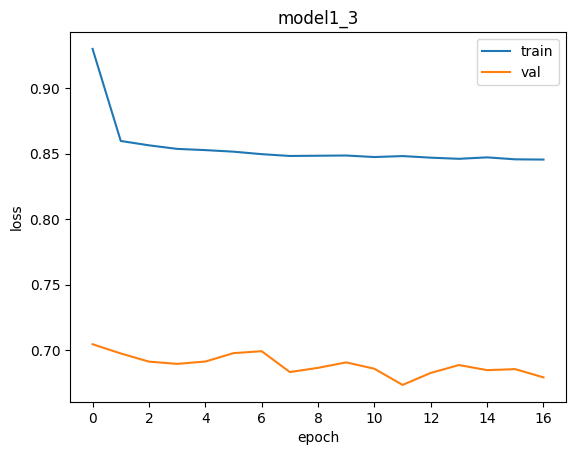

In [202]:
acc_lossplot(model1_3, 'model1_3')


### model1_4

* 각 층의 뉴런 13개/배치 256/학습률 0.1

In [203]:
model1_4=model_builder(neuron_counts[0])

In [204]:
opt = Adam(learning_rate = 0.1)
model1_4.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')

  # 조기 종료
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_4.fit(x=train_xs, y=train_ys,
            batch_size=256, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
5721/5721 [==============================] - 17s 3ms/step - loss: 1.3533 - accuracy: 0.5237 - val_loss: 1.1932 - val_accuracy: 0.5532
Epoch 2/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.4415 - accuracy: 0.4577 - val_loss: 1.2103 - val_accuracy: 0.5362
Epoch 3/100
5721/5721 [==============================] - 14s 2ms/step - loss: 1.5570 - accuracy: 0.3984 - val_loss: 1.7514 - val_accuracy: 0.2888
Epoch 4/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.7585 - accuracy: 0.2819 - val_loss: 1.7547 - val_accuracy: 0.2888
Epoch 5/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.7567 - accuracy: 0.2819 - val_loss: 1.7504 - val_accuracy: 0.2888
Epoch 6/100
5721/5721 [==============================] - 15s 3ms/step - loss: 1.7559 - accuracy: 0.2818 - val_loss: 1.7521 - val_accuracy: 0.2646


12712/12712 [==============================] - 19s 2ms/step - loss: 1.4173 - accuracy: 0.4536
딥러닝 모형의 정확도 : 45.357%


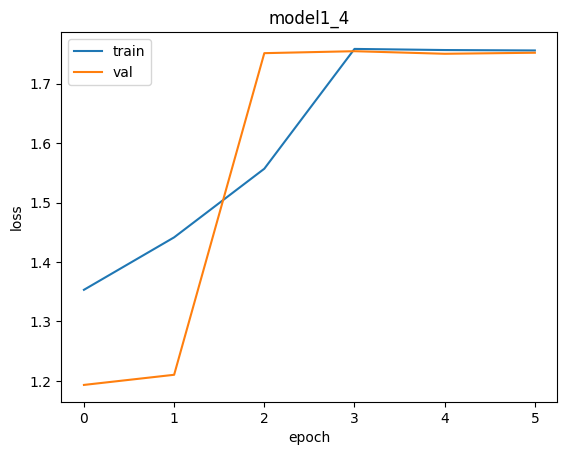

In [205]:
acc_lossplot(model1, 'model1_4')

### model1_5

* 각 층의 뉴런 13개/배치 256/학습률 0.01

In [206]:
model1_5= model_builder(neuron_counts[0])

In [207]:
opt = Adam(learning_rate = 0.01)
model1_5.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


  # 조기 종료
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_5.fit(x=train_xs, y=train_ys,
            batch_size=256, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
5721/5721 [==============================] - 18s 3ms/step - loss: 0.9196 - accuracy: 0.7054 - val_loss: 0.7033 - val_accuracy: 0.7855
Epoch 2/100
5721/5721 [==============================] - 15s 3ms/step - loss: 0.8730 - accuracy: 0.7208 - val_loss: 0.6870 - val_accuracy: 0.7819
Epoch 3/100
5721/5721 [==============================] - 14s 2ms/step - loss: 0.8691 - accuracy: 0.7252 - val_loss: 0.6863 - val_accuracy: 0.7845
Epoch 4/100
5721/5721 [==============================] - 15s 3ms/step - loss: 0.8682 - accuracy: 0.7262 - val_loss: 0.6920 - val_accuracy: 0.7806
Epoch 5/100
5721/5721 [==============================] - 15s 3ms/step - loss: 0.8698 - accuracy: 0.7267 - val_loss: 0.7023 - val_accuracy: 0.7773
Epoch 6/100
5721/5721 [==============================] - 15s 3ms/step - loss: 0.8694 - accuracy: 0.7270 - val_loss: 0.7116 - val_accuracy: 0.7794
Epoch 7/100
5721/5721 [==============================] - 15s 3ms/step - loss: 0.8685 - accuracy: 0.7278 - val_loss: 0.7010 -

12712/12712 [==============================] - 19s 2ms/step - loss: 0.6900 - accuracy: 0.7833
딥러닝 모형의 정확도 : 78.332%


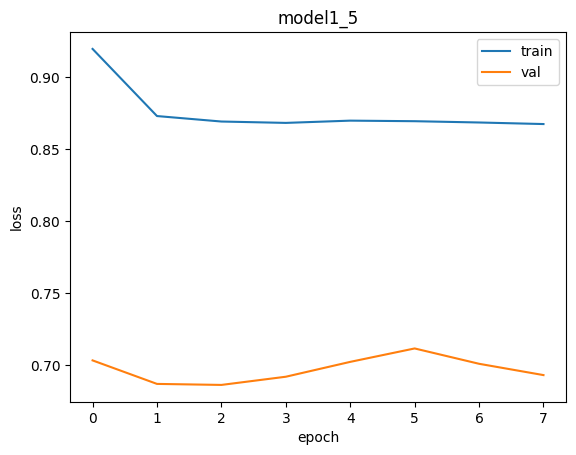

In [208]:
acc_lossplot(model1_5, 'model1_5')

### model1_6

* 각 층의 뉴런 13개/배치 256/학습률 0.001

In [209]:
model1_6 = model_builder(neuron_counts[0])

opt = Adam(learning_rate = 0.001)
model1_6.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


  # 조기 종료
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_6.fit(x=train_xs, y=train_ys,
            batch_size=256, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
5721/5721 [==============================] - 16s 3ms/step - loss: 1.1200 - accuracy: 0.6609 - val_loss: 0.7267 - val_accuracy: 0.7796
Epoch 2/100
5721/5721 [==============================] - 14s 2ms/step - loss: 0.9036 - accuracy: 0.7317 - val_loss: 0.7040 - val_accuracy: 0.7837
Epoch 3/100
5721/5721 [==============================] - 14s 3ms/step - loss: 0.8674 - accuracy: 0.7429 - val_loss: 0.7130 - val_accuracy: 0.7840
Epoch 4/100
5721/5721 [==============================] - 14s 2ms/step - loss: 0.8625 - accuracy: 0.7454 - val_loss: 0.7161 - val_accuracy: 0.7846
Epoch 5/100
5721/5721 [==============================] - 15s 3ms/step - loss: 0.8613 - accuracy: 0.7458 - val_loss: 0.7192 - val_accuracy: 0.7843
Epoch 6/100
5721/5721 [==============================] - 15s 3ms/step - loss: 0.8582 - accuracy: 0.7470 - val_loss: 0.7253 - val_accuracy: 0.7843
Epoch 7/100
5721/5721 [==============================] - 14s 3ms/step - loss: 0.8569 - accuracy: 0.7471 - val_loss: 0.7228 -

12712/12712 [==============================] - 19s 2ms/step - loss: 0.7082 - accuracy: 0.7829
딥러닝 모형의 정확도 : 78.292%


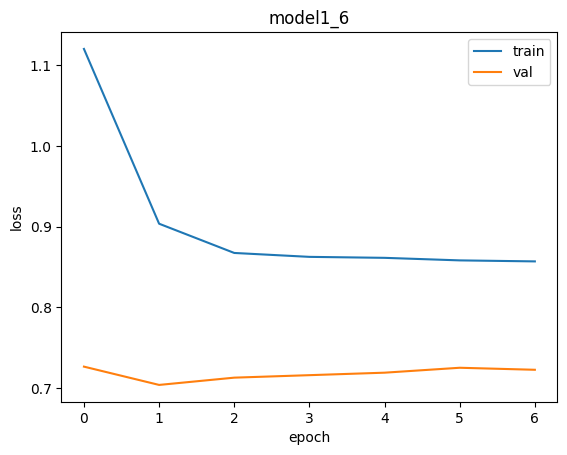

In [210]:
acc_lossplot(model1_6, 'model1_6')

### model1_7

* 각 층의 뉴런 13개/배치 512/학습률 0.1

In [211]:
model1_7 = model_builder(neuron_counts[0])

In [212]:
opt = Adam(learning_rate = 0.1)
model1_7.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_7.fit(x=train_xs, y=train_ys,
            batch_size=512, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2861/2861 [==============================] - 11s 3ms/step - loss: 1.2290 - accuracy: 0.5974 - val_loss: 0.9543 - val_accuracy: 0.7676
Epoch 2/100
2861/2861 [==============================] - 8s 3ms/step - loss: 1.2251 - accuracy: 0.5956 - val_loss: 1.0364 - val_accuracy: 0.7391
Epoch 3/100
2861/2861 [==============================] - 9s 3ms/step - loss: 1.2797 - accuracy: 0.5371 - val_loss: 1.1673 - val_accuracy: 0.5532
Epoch 4/100
2861/2861 [==============================] - 9s 3ms/step - loss: 1.2968 - accuracy: 0.5109 - val_loss: 1.1493 - val_accuracy: 0.5532
Epoch 5/100
2861/2861 [==============================] - 8s 3ms/step - loss: 1.3204 - accuracy: 0.5028 - val_loss: 1.1718 - val_accuracy: 0.5364
Epoch 6/100
2861/2861 [==============================] - 9s 3ms/step - loss: 1.3448 - accuracy: 0.4941 - val_loss: 1.1732 - val_accuracy: 0.5532


12712/12712 [==============================] - 19s 1ms/step - loss: 0.9568 - accuracy: 0.7674
딥러닝 모형의 정확도 : 76.739%


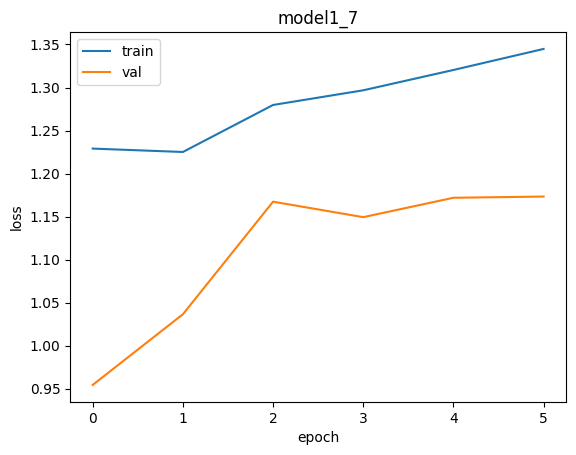

In [213]:
acc_lossplot(model1_7, 'model1_7')

### model1_8

* 각 층의 뉴런 13개/배치 512/학습률 0.01

In [214]:
model1_8 = model_builder(neuron_counts[0])

In [216]:
opt = Adam(learning_rate = 0.01)
model1_8.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_8.fit(x=train_xs, y=train_ys,
            batch_size=512, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2861/2861 [==============================] - 10s 3ms/step - loss: 0.8677 - accuracy: 0.7370 - val_loss: 0.6932 - val_accuracy: 0.7833
Epoch 2/100
2861/2861 [==============================] - 10s 3ms/step - loss: 0.8629 - accuracy: 0.7373 - val_loss: 0.6896 - val_accuracy: 0.7827
Epoch 3/100
2861/2861 [==============================] - 9s 3ms/step - loss: 0.8634 - accuracy: 0.7372 - val_loss: 0.6883 - val_accuracy: 0.7834
Epoch 4/100
2861/2861 [==============================] - 9s 3ms/step - loss: 0.8620 - accuracy: 0.7372 - val_loss: 0.6854 - val_accuracy: 0.7830
Epoch 5/100
2861/2861 [==============================] - 8s 3ms/step - loss: 0.8632 - accuracy: 0.7360 - val_loss: 0.6897 - val_accuracy: 0.7814
Epoch 6/100
2861/2861 [==============================] - 9s 3ms/step - loss: 0.8618 - accuracy: 0.7359 - val_loss: 0.6878 - val_accuracy: 0.7842
Epoch 7/100
2861/2861 [==============================] - 9s 3ms/step - loss: 0.8605 - accuracy: 0.7363 - val_loss: 0.6868 - val_

12712/12712 [==============================] - 20s 2ms/step - loss: 0.6893 - accuracy: 0.7820
딥러닝 모형의 정확도 : 78.197%


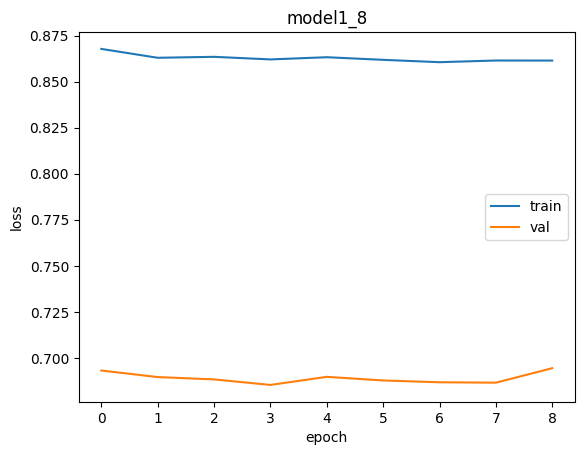

In [217]:
acc_lossplot(model1_8, 'model1_8')

### model1_9

* 각 층의 뉴런 13개/배치 1028/학습률 0.001

In [218]:
model1_9 = model_builder(neuron_counts[0])

In [219]:
opt = Adam(learning_rate = 0.001)
model1_9.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model1_9.fit(x=train_xs, y=train_ys,
            batch_size=512, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2861/2861 [==============================] - 10s 3ms/step - loss: 1.1098 - accuracy: 0.6485 - val_loss: 0.7089 - val_accuracy: 0.7792
Epoch 2/100
2861/2861 [==============================] - 9s 3ms/step - loss: 0.8812 - accuracy: 0.7333 - val_loss: 0.6932 - val_accuracy: 0.7820
Epoch 3/100
2861/2861 [==============================] - 9s 3ms/step - loss: 0.8659 - accuracy: 0.7401 - val_loss: 0.6920 - val_accuracy: 0.7824
Epoch 4/100
2861/2861 [==============================] - 8s 3ms/step - loss: 0.8611 - accuracy: 0.7430 - val_loss: 0.6884 - val_accuracy: 0.7823
Epoch 5/100
2861/2861 [==============================] - 9s 3ms/step - loss: 0.8584 - accuracy: 0.7450 - val_loss: 0.6886 - val_accuracy: 0.7826
Epoch 6/100
2861/2861 [==============================] - 9s 3ms/step - loss: 0.8539 - accuracy: 0.7478 - val_loss: 0.6856 - val_accuracy: 0.7839
Epoch 7/100
2861/2861 [==============================] - 8s 3ms/step - loss: 0.8527 - accuracy: 0.7486 - val_loss: 0.6810 - val_a

12712/12712 [==============================] - 19s 2ms/step - loss: 0.6839 - accuracy: 0.7951
딥러닝 모형의 정확도 : 79.505%


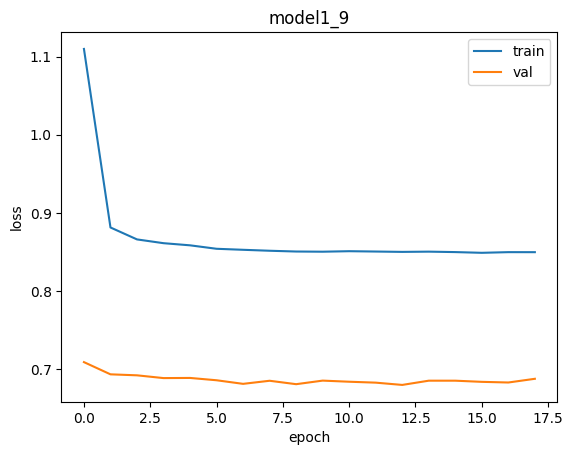

In [220]:
acc_lossplot(model1_9, 'model1_9')

### model2

* 각 층의 뉴런 50개/batch=512/lr = 0.001


In [221]:
model2 = model_builder(neuron_counts[1])
model3 = model_builder(neuron_counts[2])

In [222]:
model2.summary()

Model: "model_40"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 tf.__operators__.getitem_9 (Sl  (None,)             0           ['input_9[0][0]']                
 icingOpLambda)                                                                                   
                                                                                                  
 tf.__operators__.getitem_10 (S  (None,)             0           ['input_9[0][0]']                
 licingOpLambda)                                                                                  
                                                                                           

In [223]:
opt = Adam(learning_rate = 0.001)
model2.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model2.fit(x=train_xs, y=train_ys,
            batch_size=512, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2861/2861 [==============================] - 14s 4ms/step - loss: 0.7511 - accuracy: 0.7762 - val_loss: 0.5067 - val_accuracy: 0.8378
Epoch 2/100
2861/2861 [==============================] - 12s 4ms/step - loss: 0.5650 - accuracy: 0.8235 - val_loss: 0.4648 - val_accuracy: 0.8511
Epoch 3/100
2861/2861 [==============================] - 13s 4ms/step - loss: 0.5392 - accuracy: 0.8304 - val_loss: 0.4547 - val_accuracy: 0.8575
Epoch 4/100
2861/2861 [==============================] - 12s 4ms/step - loss: 0.5289 - accuracy: 0.8340 - val_loss: 0.4405 - val_accuracy: 0.8608
Epoch 5/100
2861/2861 [==============================] - 12s 4ms/step - loss: 0.5233 - accuracy: 0.8357 - val_loss: 0.4380 - val_accuracy: 0.8607
Epoch 6/100
2861/2861 [==============================] - 13s 4ms/step - loss: 0.5197 - accuracy: 0.8378 - val_loss: 0.4353 - val_accuracy: 0.8625
Epoch 7/100
2861/2861 [==============================] - 13s 4ms/step - loss: 0.5169 - accuracy: 0.8389 - val_loss: 0.4323 -

12712/12712 [==============================] - 21s 2ms/step - loss: 0.4209 - accuracy: 0.8664
딥러닝 모형의 정확도 : 86.645%


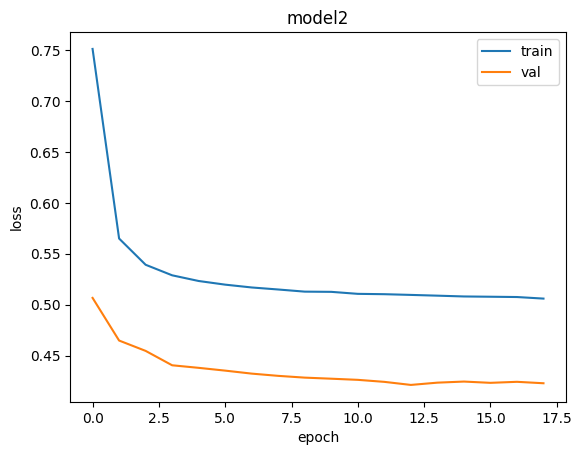

In [224]:
acc_lossplot(model2, 'model2')

### model3

* 각 층의 뉴런의 개수 100/batch=512/lr = 0.001

In [225]:
model3.summary()

Model: "model_41"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 tf.__operators__.getitem_9 (Sl  (None,)             0           ['input_9[0][0]']                
 icingOpLambda)                                                                                   
                                                                                                  
 tf.__operators__.getitem_10 (S  (None,)             0           ['input_9[0][0]']                
 licingOpLambda)                                                                                  
                                                                                           

In [226]:
opt = Adam(learning_rate = 0.001)
model3.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics='accuracy')


checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                  save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
train_xs = [train_category_xs,train_numeric_xs]

history = model3.fit(x=train_xs, y=train_ys,
            batch_size=512, epochs=100,
            validation_split=0.1,
            verbose=1,
            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2861/2861 [==============================] - 23s 8ms/step - loss: 0.6141 - accuracy: 0.8130 - val_loss: 0.4335 - val_accuracy: 0.8603
Epoch 2/100
2861/2861 [==============================] - 19s 7ms/step - loss: 0.4763 - accuracy: 0.8510 - val_loss: 0.3978 - val_accuracy: 0.8713
Epoch 3/100
2861/2861 [==============================] - 19s 7ms/step - loss: 0.4521 - accuracy: 0.8580 - val_loss: 0.3811 - val_accuracy: 0.8746
Epoch 4/100
2861/2861 [==============================] - 18s 6ms/step - loss: 0.4416 - accuracy: 0.8610 - val_loss: 0.3753 - val_accuracy: 0.8769
Epoch 5/100
2861/2861 [==============================] - 19s 7ms/step - loss: 0.4363 - accuracy: 0.8623 - val_loss: 0.3694 - val_accuracy: 0.8782
Epoch 6/100
2861/2861 [==============================] - 18s 6ms/step - loss: 0.4321 - accuracy: 0.8638 - val_loss: 0.3667 - val_accuracy: 0.8779
Epoch 7/100
2861/2861 [==============================] - 19s 7ms/step - loss: 0.4289 - accuracy: 0.8646 - val_loss: 0.3646 -

12712/12712 [==============================] - 20s 2ms/step - loss: 0.3416 - accuracy: 0.8876
딥러닝 모형의 정확도 : 88.760%


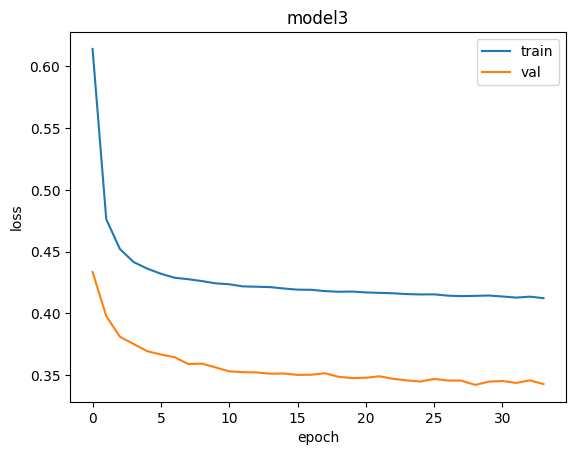

In [227]:
acc_lossplot(model3, 'model3')

In [229]:
# model1_1.save('model1_1.h5')
model1_2.save('model1_2.h5')
model1_3.save('model1_3.h5')
model1_4.save('model1_4.h5')
model1_5.save('model1_5.h5')
model1_6.save('model1_6.h5')
model1_7.save('model1_7.h5')
model1_8.save('model1_8.h5')
model1_9.save('model1_9.h5')

model2.save('model2.h5')
model3.save('model3.h5')